In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv('first_lab.csv', delimiter=';')

In [22]:
print(df.columns)

df['I'] = df['I'] / 1000000 #так как единицы измерения миливольты

Index(['U', 'I'], dtype='object')


In [23]:
delta_U = 0.01  # Абсолютная погрешность U
delta_I = 0.000001 # Абсолютная погрешность I


df['delta_U'] = delta_U
df['delta_I'] = delta_I

df.head(17)

,U,I,delta_U,delta_I
0,0.04,0.000005,0.01,0.000001
1,0.18,0.000018,0.01,0.000001
2,0.36,0.000036,0.01,0.000001
3,0.40,0.000040,0.01,0.000001
4,0.58,0.000058,0.01,0.000001
5,0.71,0.000071,0.01,0.000001
6,0.91,0.000092,0.01,0.000001
7,1.10,0.000110,0.01,0.000001
8,1.12,0.000113,0.01,0.000001
9,1.15,0.000116,0.01,0.000001


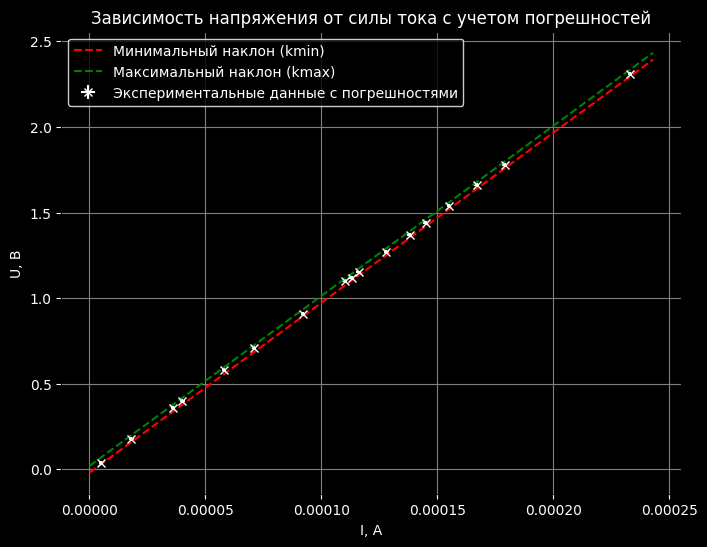

kmin = 9930.2123 Ом
kmax = 9930.2123 Ом
Среднее значение k = 9930.2123 Ом
Сопротивление R = 9930.2123 Ом ± 0.0000 Ом


In [15]:
plt.figure(figsize=(8, 6), facecolor='black')

ax = plt.gca()
ax.set_facecolor('black')

# Построение экспериментальных данных с погрешностями, используя кресты в качестве маркеров
plt.errorbar(df['I'], df['U'], xerr=df['delta_I'], yerr=df['delta_U'], fmt='x', color='white', ecolor='white', label='Экспериментальные данные с погрешностями')

I_kmin = df['I'] + df['delta_I']
U_kmin = df['U'] - df['delta_U']

I_kmax = df['I'] - df['delta_I']
U_kmax = df['U'] + df['delta_U']

kmin, bmin = np.polyfit(I_kmin, U_kmin, 1)
kmax, bmax = np.polyfit(I_kmax, U_kmax, 1)

k_avg = (kmin + kmax) / 2

delta_R = (kmax - kmin) / 2

R = k_avg

I_plot = np.linspace(0, df['I'].max() + 0.00001, 100)
U_kmin_line = kmin * I_plot + bmin
U_kmax_line = kmax * I_plot + bmax

# Построение линий минимального и максимального наклона
plt.plot(I_plot, U_kmin_line, 'r--', label='Минимальный наклон (kmin)')
plt.plot(I_plot, U_kmax_line, 'g--', label='Максимальный наклон (kmax)')

# Настройка стилей текста и элементов графика для лучшей видимости на черном фоне
plt.xlabel('I, А', color='white')
plt.ylabel('U, В', color='white')
plt.title('Зависимость напряжения от силы тока с учетом погрешностей', color='white')

# Настройка легенды
legend = plt.legend(facecolor='black', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# Настройка цвета делений осей
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Настройка сетки
plt.grid(True, color='gray')

plt.show()

print(f'kmin = {kmin:.4f} Ом')
print(f'kmax = {kmax:.4f} Ом')
print(f'Среднее значение k = {k_avg:.4f} Ом')
print(f'Сопротивление R = {R:.4f} Ом ± {delta_R:.4f} Ом')
